### Probability Ratio Encoding

1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived=1-probability(Survived)
3. probability(Survived)/probability(Not Survived)
4. Dictonary to map cabin with probability
5. Replace with the categorical feature

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Titanic_train.csv',usecols=['Cabin','Survived','Fare'])

In [3]:
dataset.head()

,Survived,Fare,Cabin
0,0,7.2500,NaN
1,1,71.2833,C85
2,1,7.9250,NaN
3,1,53.1000,C123
4,0,8.0500,NaN


In [4]:
dataset.isnull().mean()

Survived    0.000000
Fare        0.000000
Cabin       0.771044
dtype: float64

In [5]:
dataset['Cabin'].fillna("Missing",inplace=True)

In [6]:
dataset.head()

,Survived,Fare,Cabin
0,0,7.2500,Missing
1,1,71.2833,C85
2,1,7.9250,Missing
3,1,53.1000,C123
4,0,8.0500,Missing


In [7]:
dataset['Cabin'][0]

'Missing'

In [8]:
dataset['Cabin'][0][2]

's'

In [9]:
dataset['Cabin']=dataset['Cabin'].astype(str).str[0]

In [10]:
dataset.head()

,Survived,Fare,Cabin
0,0,7.2500,M
1,1,71.2833,C
2,1,7.9250,M
3,1,53.1000,C
4,0,8.0500,M


In [11]:
dataset['Cabin'].value_counts().sort_values()

T      1
G      4
F     13
A     15
E     32
D     33
B     47
C     59
M    687
Name: Cabin, dtype: int64

In [12]:
prob_data=dataset.groupby('Cabin')['Survived'].mean()

In [13]:
prob_data

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [14]:
dataset.head()

,Survived,Fare,Cabin
0,0,7.2500,M
1,1,71.2833,C
2,1,7.9250,M
3,1,53.1000,C
4,0,8.0500,M


In [15]:
ready_to_map=dataset.groupby('Cabin')['Survived'].mean().to_dict()

In [16]:
ready_to_map

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [17]:
dataset['Cabin_Survived_prob']=dataset['Cabin'].map(ready_to_map)

In [18]:
dataset.head()

,Survived,Fare,Cabin,Cabin_Survived_prob
0,0,7.2500,M,0.299854
1,1,71.2833,C,0.593220
2,1,7.9250,M,0.299854
3,1,53.1000,C,0.593220
4,0,8.0500,M,0.299854


In [19]:
dataset['Cabin_Dead_prob']=1-dataset['Cabin_Survived_prob']

In [20]:
dataset.head()

,Survived,Fare,Cabin,Cabin_Survived_prob,Cabin_Dead_prob
0,0,7.2500,M,0.299854,0.700146
1,1,71.2833,C,0.593220,0.406780
2,1,7.9250,M,0.299854,0.700146
3,1,53.1000,C,0.593220,0.406780
4,0,8.0500,M,0.299854,0.700146


In [21]:
dataset['Cabin_Probability_ratio']=dataset['Cabin_Survived_prob']/dataset['Cabin_Dead_prob']

In [22]:
dataset.head()

,Survived,Fare,Cabin,Cabin_Survived_prob,Cabin_Dead_prob,Cabin_Probability_ratio
0,0,7.2500,M,0.299854,0.700146,0.428274
1,1,71.2833,C,0.593220,0.406780,1.458333
2,1,7.9250,M,0.299854,0.700146,0.428274
3,1,53.1000,C,0.593220,0.406780,1.458333
4,0,8.0500,M,0.299854,0.700146,0.428274


##### Cabin Successfully converted into Probability Ratio Encoding 

## Transformation of feature

Why Transformation of Features Are Required?


Feature transformation involves mapping a set of values for the feature to a new set of values to make the representation of
the data more suitable or easier to process for the downstream analysis.


Linear Regression---Gradient Descent ----Global Minima
Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance
Every Point has some vectors and Direction


Beacuse the Algoritham like KNN ,K Mean,Linear Regression .. uses some of the mathematical formulae, So if the data would be Scalable the data more suitable or easier to process for the downstream analysis.

### Type of Transformation

1. Normalization And Standardization(Using StandardScaler)
2. Scaling to Minimum And Maximum values(Using MinMaxScaler)
3. Scaling To Median And Quantiles(Using RobustScaler)
4. Guassian Transformation

   a)Logarithmic Transformation
   
   b)Reciprocal Trnasformation
   
   c)Square Root Transformation 
   
   d)Exponential Trnasformation
   
   e)Box Cox Transformation


### 1.Standardization

we try to bring the values of features to similar scale.

Standarization mean centering the value to zero.

formula z=X-X.mean()/std



In [23]:
dataset=pd.read_csv('Titanic_train.csv',usecols=['Age','Survived','Pclass','Fare'])

In [24]:
dataset.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [25]:
dataset.isnull().mean()

Survived    0.000000
Pclass      0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [26]:
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)

In [27]:
dataset.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

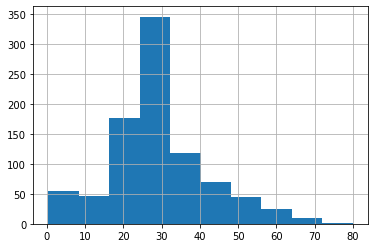

In [28]:
dataset['Age'].hist()

In summary, fit performs the training, transform changes the data in the pipeline in order to pass it on to the next stage 
in the pipeline, and fit_transform does both the fitting and the transforming in one possibly optimized step.


In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


scaled_value=scaler.fit_transform(dataset)

In [30]:
scaled_value

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

we need to convert this 2D array into DataFrame

In [31]:
scaled_data=pd.DataFrame(scaled_value,columns=dataset.columns)

In [32]:
scaled_data.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <a list of 20 Patch objects>)

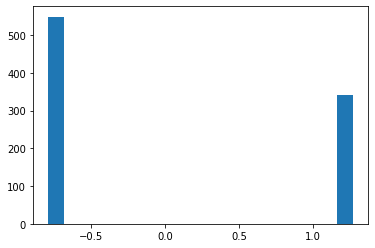

In [34]:
plt.hist(scaled_data['Survived'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

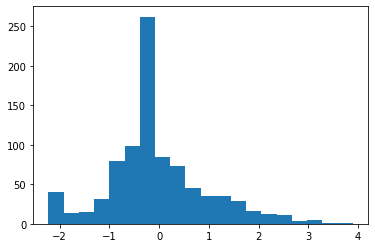

In [35]:
plt.hist(scaled_data['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

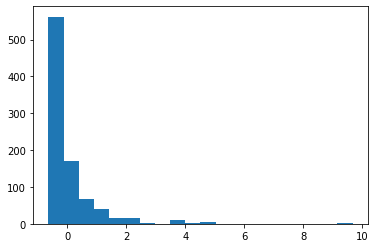

In [36]:
plt.hist(scaled_data['Fare'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

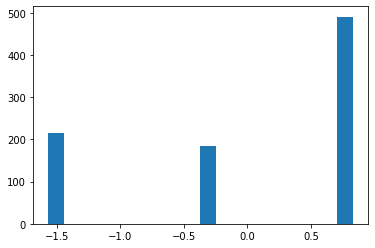

In [37]:
plt.hist(scaled_data['Pclass'],bins=20)

## MinMaxScaler

Min Max Scaling scales the values between 0 to 1.

X_scaled = (X - X.min / (X.max - X.min)



In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_value=scaler.fit_transform(dataset)

scaled_dataset=pd.DataFrame(scaled_value,columns=dataset.columns)

In [39]:
scaled_dataset.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


Values of feature are scaled between 0 to 1

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

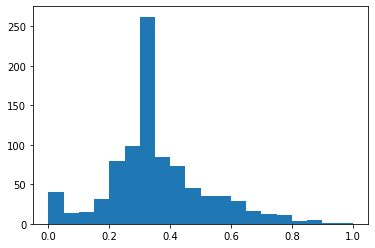

In [40]:
plt.hist(scaled_dataset['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

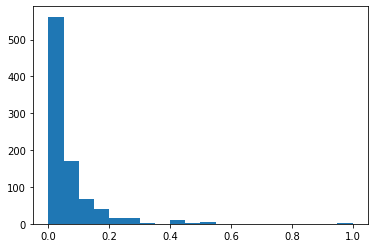

In [41]:
plt.hist(scaled_dataset['Fare'],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

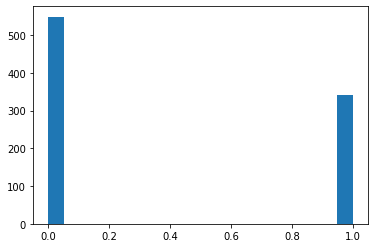

In [42]:
plt.hist(scaled_dataset['Survived'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

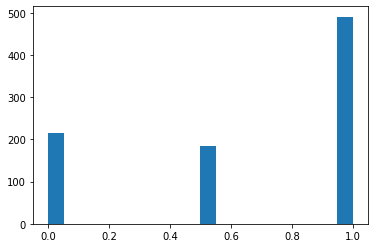

In [43]:
plt.hist(scaled_dataset['Pclass'],bins=20)

## Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9 is 90 percentile---because 90% of all values in this group is less than 9.
1 is 10 precentile---beacuse 10% of all values in this group is less than 1.



In [44]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_value=scaler.fit_transform(dataset)

scaled_dataset=pd.DataFrame(scaled_value,columns=dataset.columns)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

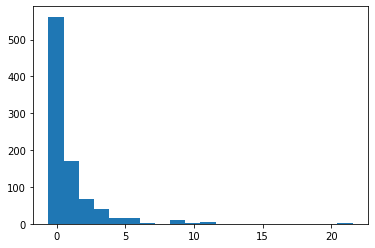

In [45]:
plt.hist(scaled_dataset['Fare'],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

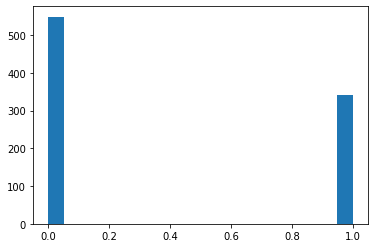

In [46]:
plt.hist(scaled_dataset['Survived'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

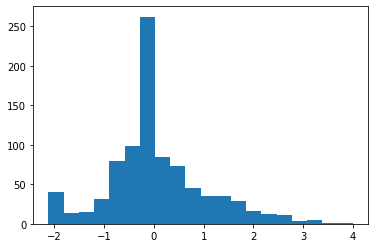

In [47]:
plt.hist(scaled_dataset['Age'],bins=20)